### Cleanical Trial of  Auralin And Novodra

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# loading datasets
patients = pd.read_excel("D:\Vijay\C_EDA\clinical_trials.xlsx",sheet_name='patients')
treatments = pd.read_excel("D:\Vijay\C_EDA\clinical_trials.xlsx",sheet_name='treatments')
adverse_reactions = pd.read_excel("D:\Vijay\C_EDA\clinical_trials.xlsx",sheet_name='adverse_reactions')
treatments_cut = pd.read_excel("D:\Vijay\C_EDA\clinical_trials.xlsx",sheet_name="treatment_cut")

### Summary:

This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

175 patients switched to Auralin for 24 weeks
175 patients continued using Novodra for 24 weeks
Data about patients feeling some adverse effects is also recorded.

### Column Description:
* Table  -> patients:

* patient_id: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin

* assigned_sex: the assigned sex of each patient at birth (male or female)

* given_name: the given name (i.e. first name) of each patient

* surname: the surname (i.e. last name) of each patient
* address: the main address for each patient
* city: the corresponding city for the main address of each patient
* state: the corresponding state for the main address of each patient
* zip_code: the corresponding zip code for the main address of each patient
* country: the corresponding country for the main address of each patient (all United states for this clinical trial)
* contact: phone number and email information for each patient
* birthdate: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)
* weight: the weight of each patient in pounds (lbs)
* height: the height of each patient in inches (in)
* bmi: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI >= 38.

* Table -> treatments and treatment_cut:
* given_name: the given name of each patient in the Master Patient Index that took part in the clinical trial
* surname: the surname of each patient in the Master Patient Index that took part in the clinical trial
* auralin:(oral medicine) the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the international unit of measurement and the standard measurement for insulin.
* novodra:(injection) same as above, except for patients that continued treatment with Novodra
* hba1c_start: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
* hba1c_end: the patient's HbA1c level at the end of the last week of treatment
* hba1c_change: the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

* Table -> adverse_reactions
* given_name: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
* surname: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
* adverse_reaction: the adverse reaction reported by the patient

In [3]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [4]:
patients.isnull().sum() 

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city            12
state           12
zip_code        12
country         12
contact         12
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [5]:
patients.duplicated().sum()

0

In [6]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [7]:
patients[patients['height'] == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [8]:
treatments.head(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [9]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [10]:
treatments.isnull().sum()

given_name        0
surname           0
auralin           0
novodra           0
hba1c_start       0
hba1c_end         0
hba1c_change    109
dtype: int64

In [11]:
treatments.duplicated().sum()

1

In [12]:
treatments[treatments.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [13]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [14]:
treatments_cut.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [15]:
treatments_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    70 non-null     object 
 1   surname       70 non-null     object 
 2   auralin       70 non-null     object 
 3   novodra       70 non-null     object 
 4   hba1c_start   70 non-null     float64
 5   hba1c_end     70 non-null     float64
 6   hba1c_change  42 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.0+ KB


In [16]:
treatments_cut.isnull().sum()

given_name       0
surname          0
auralin          0
novodra          0
hba1c_start      0
hba1c_end        0
hba1c_change    28
dtype: int64

In [17]:
treatments_cut.duplicated().sum()

0

In [18]:
treatments_cut.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [19]:
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [20]:
adverse_reactions.duplicated().sum()

0

In [21]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


From above assesment got following issues

### Issues with the dataset
- Dirty Data

Table - Patients

- patient_id = 9 has misspelled name 'Dsvid' instead of David -accuracy
- state col sometimes contain full name and some times abbrivietation -consistency
- zip code col has entries with 4 digit -validity
- data missing for 12 patients in address,city, state,zip_code ,country, contact -completion
- incorrect data type assigned to sex, zip code, birthdate -validity
- duplicate entries by the name of John Doe -accuracy
- one patient has weight = 48 pounds -accuracy
- one patient has height = 27 inches -accuracy

Table - Treatments & Treatments_cut

- given_name and surname col is is all lower case -consistency
- remove u from Auralin and Novadra cols -validity
- '-' in novadra and Auralin col treated as nan -validity
- missing values in hba1c_change col -completion
- 1 duplicate entry by the name Joseph day -accuracy
- in hba1c_change 9 instead of 4 -accuracy


Table - Adverse_reactions

- given_name and surname are all in lower case -consistency



* Messy Data

Table - Patients

- contact col contains both phone and email

Table - Treatments & Treatments_cut

- Auralin and Novadra col should be split into 2 cols start and end dose
  merge both the tables

Table - Adverse_reactions

- This table should not exist independently

In [22]:
# creating copies of datasets before starting cleaning
patients_df = patients.copy()
treatments_df = treatments.copy()
treatments_cut_df = treatments_cut.copy()
adverse_reactions_df = adverse_reactions.copy()

In [23]:
# Completeness <- Validity <- Accuracy <- Consistency

In [24]:
patients_df.fillna(0,inplace=True) # fillling missing values

In [25]:
patients_df.isnull().sum()

patient_id      0
assigned_sex    0
given_name      0
surname         0
address         0
city            0
state           0
zip_code        0
country         0
contact         0
birthdate       0
weight          0
height          0
bmi             0
dtype: int64

In [26]:
# changing data types of sex, zip code, birthdate col
patients_df['assigned_sex']=patients_df['assigned_sex'].astype('category')


In [27]:
patients_df['zip_code']=patients_df['zip_code'].astype('int64')

In [28]:
patients_df["birthdate"] = pd.to_datetime(patients_df["birthdate"])

In [29]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       503 non-null    object        
 5   city          503 non-null    object        
 6   state         503 non-null    object        
 7   zip_code      503 non-null    int64         
 8   country       503 non-null    object        
 9   contact       503 non-null    object        
 10  birthdate     503 non-null    datetime64[ns]
 11  weight        503 non-null    float64       
 12  height        503 non-null    int64         
 13  bmi           503 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 51.8+ KB


patients_df[patients_df[['given_name','surname']].duplicated()]

In [30]:
patients_df[patients_df[['given_name','surname']].duplicated()] # some duplicates in the data 

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,johndoe@email.com1234567890,1975-01-01,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,johndoe@email.com1234567890,1975-01-01,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,johndoe@email.com1234567890,1975-01-01,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,johndoe@email.com1234567890,1975-01-01,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,johndoe@email.com1234567890,1975-01-01,180.0,72,24.4


In [1]:
patients_df=patients_df.drop_duplicates(subset=['given_name','surname'],keep='first') 
# removed duplicated records

NameError: name 'patients_df' is not defined

In [32]:
patients_df[(patients_df['given_name']=='John') & (patients_df['surname']=='Doe')]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,johndoe@email.com1234567890,1975-01-01,180.0,72,24.4


In [33]:
patients_df

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,1959-04-10,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1971-01-13,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,1952-02-13,176.9,67,27.7


In [34]:
patients_df['given_name'].replace('Dsvid','David',inplace=True) # replaced correct name David

In [35]:
patients_df[patients_df['weight']==48.8] # one patients showing inaccurate weight

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,330-202-2145CamillaZaitseva@superrito.com,1938-11-26,48.8,63,19.1


In [36]:
(19.1*((63)**2))/703 # by using formula of BMI calculated correct weight

107.83485064011381

In [37]:
patients_df['weight'].replace(48.8,107.8,inplace=True)

In [38]:
patients_df[patients_df['weight']==48.8] 

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [39]:
patients_df[patients_df['height']==27] # one patient showing inaccurate height

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,27,26.1


In [40]:
import math as mt

In [41]:
mt.sqrt((192.3*703)/26.1)

71.96926227663917

In [42]:
patients_df['height'].replace(27,72,inplace=True) # replaced height with correct one

In [43]:
patients_df[patients_df['height']==27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [44]:
patients_df[['state','country']].value_counts()

state       country      
California  United States    36
TX          United States    32
New York    United States    25
CA          United States    24
MA          United States    22
PA          United States    18
NY          United States    17
GA          United States    15
OH          United States    14
Illinois    United States    14
OK          United States    13
MI          United States    13
LA          United States    13
Florida     United States    13
NJ          United States    12
0           0                12
VA          United States    11
IL          United States    10
MS          United States    10
WI          United States    10
IN          United States     9
FL          United States     9
TN          United States     9
AL          United States     9
MN          United States     9
KY          United States     8
WA          United States     8
NC          United States     8
MO          United States     7
ID          United States     6
KS          Un

CA
NY
IL
FL
NE



In [45]:
#changed all states name by their short form 
patients_df['state'].replace('California',"CA",inplace=True)
patients_df['state'].replace('Nebraska',"NE",inplace=True)
patients_df['state'].replace('Florida',"FL",inplace=True)

patients_df['state'].replace('New York',"NY",inplace=True)
patients_df['state'].replace('Illinois',"IL",inplace=True)

In [46]:
patients_df[['state','country']].value_counts()

state  country      
CA     United States    60
NY     United States    42
TX     United States    32
IL     United States    24
FL     United States    22
MA     United States    22
PA     United States    18
GA     United States    15
OH     United States    14
LA     United States    13
OK     United States    13
MI     United States    13
0      0                12
NJ     United States    12
VA     United States    11
WI     United States    10
MS     United States    10
IN     United States     9
AL     United States     9
TN     United States     9
MN     United States     9
KY     United States     8
NC     United States     8
WA     United States     8
MO     United States     7
KS     United States     6
NE     United States     6
NV     United States     6
ID     United States     6
IA     United States     5
SC     United States     5
CT     United States     5
ND     United States     4
CO     United States     4
ME     United States     4
AR     United States     4
AZ     

In [47]:
patients_df[patients_df['contact']=='PatrickGersten@rhyta.com402-848-4923']  
# patient having all information same except name might be duplicated record. 

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,PatrickGersten@rhyta.com402-848-4923,1954-05-03,138.2,71,19.3
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,PatrickGersten@rhyta.com402-848-4923,1954-05-03,138.2,71,19.3


In [48]:
patients_df=patients_df[patients_df['given_name']!='Pat'] # removed that duplicated record

In [49]:
patients_df[patients_df['given_name']=='Pat']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [50]:
patients_df[patients_df['contact']=='304-438-2648SandraCTaylor@dayrep.com']
# patient having all information same except name might be duplicated record

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,304-438-2648SandraCTaylor@dayrep.com,1960-10-23,206.1,64,35.4
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,304-438-2648SandraCTaylor@dayrep.com,1960-10-23,206.1,64,35.4


In [51]:
patients_df=patients_df.drop_duplicates(subset=['contact'],keep='first')# removed duplicated record

In [52]:
patients_df

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,72,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,male,Masataka,Murakami,1179 Patton Lane,Tulsa,OK,74116,United States,MasatakaMurakami@einrot.com+1 (918) 984-9171,1937-08-19,155.1,72,21.0
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,1959-04-10,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1971-01-13,171.2,67,26.8


In [53]:
treatments_df

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


In [54]:
treatments_df = pd.concat([treatments_df,treatments_cut_df])
# concatenated two separate datasets of same data in to one table

In [55]:
treatments_df = treatments_df.melt(id_vars=['given_name', 'surname' ,'hba1c_start', 'hba1c_end','hba1c_change'],var_name='type',value_name='dosage_range')

#created two columns type and dosage range using melt function

In [56]:
treatments_df = treatments_df[treatments_df['dosage_range'] != '-'] # excluded records that contain '-'

In [57]:
treatments_df['dosage_start'] = treatments_df['dosage_range'].str.split('-').str.get(0)
treatments_df['dosage_end'] = treatments_df['dosage_range'].str.split('-').str.get(1)
#created two new columns from dosage range

In [58]:
treatments_df

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_range,dosage_start,dosage_end
0,veronika,jindrová,7.63,7.20,NaN,auralin,41u - 48u,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u
9,asia,woźniak,7.76,7.37,NaN,auralin,30u - 36u,30u,36u
...,...,...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.95,novodra,55u - 51u,55u,51u
690,maret,sultygov,7.67,7.30,NaN,novodra,26u - 23u,26u,23u
694,lixue,hsueh,9.21,8.80,0.91,novodra,22u - 23u,22u,23u
696,jakob,jakobsen,7.96,7.51,0.95,novodra,28u - 26u,28u,26u


In [59]:
treatments_df['dosage_start'].replace('u','',inplace=True) 
# removed all u's from dosage start and end columns

In [60]:
treatments_df['dosage_end'].replace('u','',inplace=True)

In [61]:
treatments_df.drop(columns='dosage_range',inplace=True) # droped dosage range colums

In [62]:
treatments_df['dosage_start'] = treatments_df['dosage_start'].str.replace('u','')
treatments_df['dosage_end'] = treatments_df['dosage_end'].str.replace('u','')

In [63]:
treatments_df['given_name']=treatments_df['given_name'].str.title()
treatments_df['surname']=treatments_df['surname'].str.title()

In [64]:
treatments_df['dosage_start'] = treatments_df['dosage_start'].astype('int')
treatments_df['dosage_end'] = treatments_df['dosage_end'].astype('int')

In [65]:
treatments_df['hba1c_change']=treatments_df['hba1c_start']-treatments_df['hba1c_end']

In [66]:
treatments_df

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41,48
3,Skye,Gormanston,7.97,7.62,0.35,auralin,33,36
6,Sophia,Haugen,7.65,7.27,0.38,auralin,37,42
7,Eddie,Archer,7.89,7.55,0.34,auralin,31,38
9,Asia,Woźniak,7.76,7.37,0.39,auralin,30,36
...,...,...,...,...,...,...,...,...
688,Christopher,Woodward,7.51,7.06,0.45,novodra,55,51
690,Maret,Sultygov,7.67,7.30,0.37,novodra,26,23
694,Lixue,Hsueh,9.21,8.80,0.41,novodra,22,23
696,Jakob,Jakobsen,7.96,7.51,0.45,novodra,28,26


In [67]:
adverse_reactions_df['given_name']=adverse_reactions_df['given_name'].str.title() 
# converted all names of patients in same format


In [68]:
adverse_reactions_df

,given_name,surname,adverse_reaction
0,Berta,napolitani,injection site discomfort
1,Lena,baer,hypoglycemia
2,Joseph,day,hypoglycemia
3,Flavia,fiorentino,cough
4,Manouck,wubbels,throat irritation
5,Jasmine,sykes,hypoglycemia
6,Louise,johnson,hypoglycemia
7,Albinca,komavec,hypoglycemia
8,Noe,aranda,hypoglycemia
9,Sofia,hermansen,injection site discomfort


In [69]:
adverse_reactions_df['surname']=adverse_reactions_df['surname'].str.title()


In [70]:
treatments_df = treatments_df.merge(adverse_reactions_df, how ='left', on=['given_name','surname']) 
#merged adverse reaction column to treatments_df table

In [73]:
treatments_df['adverse_reaction'].fillna('No_reaction',inplace=True) 
#filled all null values in adverse reaction with no reaction

In [75]:
treatments_df.groupby('type')['hba1c_change'].mean() 
#average chnage in hba1c for differnt treatments

type
auralin    0.387657
novodra    0.404914
Name: hba1c_change, dtype: float64

In [79]:
patients_df1=patients_df.merge(treatments_df,how='inner',on=['given_name','surname'])
#merged treatments to patient table to get consolidated data 

In [97]:
patients_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 338
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   patient_id        339 non-null    int64         
 1   assigned_sex      339 non-null    category      
 2   given_name        339 non-null    object        
 3   surname           339 non-null    object        
 4   address           339 non-null    object        
 5   city              339 non-null    object        
 6   state             339 non-null    object        
 7   zip_code          339 non-null    int64         
 8   country           339 non-null    object        
 9   contact           339 non-null    object        
 10  birthdate         339 non-null    datetime64[ns]
 11  weight            339 non-null    float64       
 12  height            339 non-null    int64         
 13  bmi               339 non-null    float64       
 14  hba1c_start       339 non-

### Exploratory Data Analysis 

In [81]:
patients_df1['assigned_sex'].value_counts() #sex wise data 

female    173
male      166
Name: assigned_sex, dtype: int64

<AxesSubplot:xlabel='assigned_sex'>

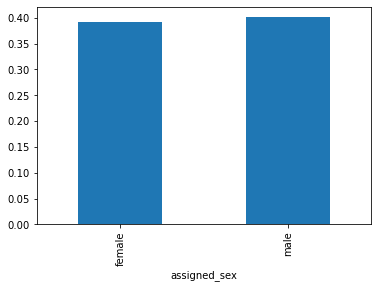

In [84]:
patients_df1.groupby('assigned_sex')['hba1c_change'].mean().plot(kind='bar') 
#sex wise Average hba1c_change

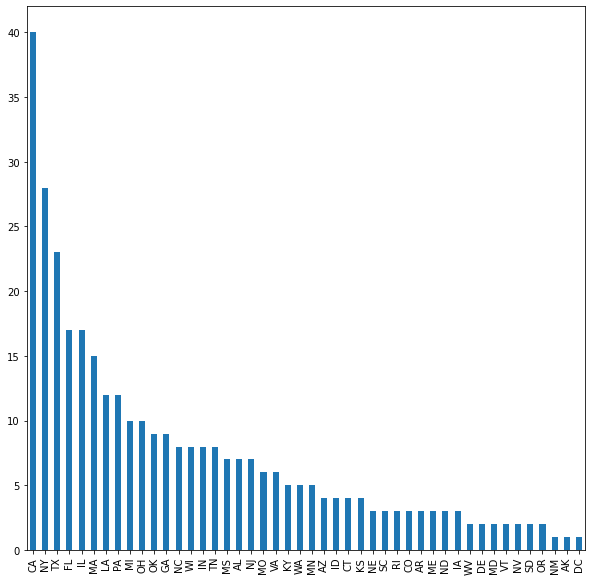

In [95]:
plt.figure(figsize=(10,10))

patients_df1['state'].value_counts().plot(kind='bar')
plt.show()
# state wise patients participted in clinical trail

In [96]:
#City wise number of patients
patients_df1['city'].value_counts().head(10)

New York        8
Houston         5
San Diego       5
Tulsa           5
Lombard         4
Pittsburgh      4
San Antonio     4
Manhattan       3
Philadelphia    3
Los Angeles     3
Name: city, dtype: int64

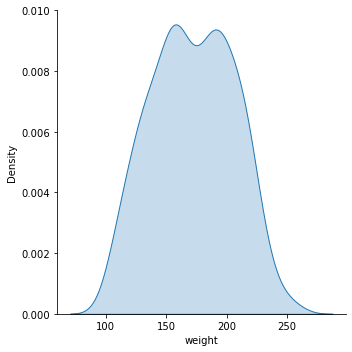

In [100]:
# to check distribution of weight.
sns.displot(data=patients_df1,x='weight',kind='kde',fill=True)

In [101]:
patients_df1['weight'].skew() # weight is almost normaly distributed

0.001906898920480021

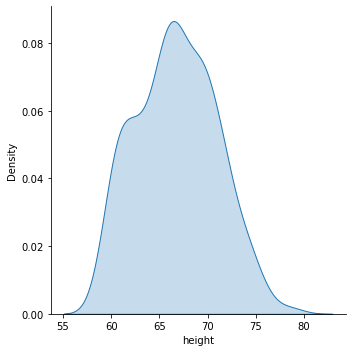

In [102]:
sns.displot(data=patients_df1,x='height',kind='kde',fill=True) # disribution of height

In [103]:
patients_df1['height'].skew() # slighlty positvely skewed

0.14639032694855106

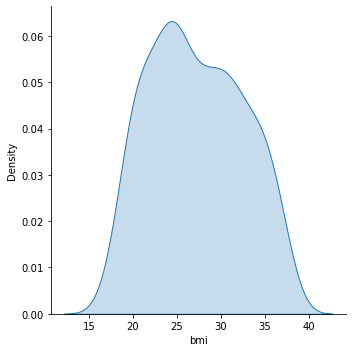

In [104]:
sns.displot(data=patients_df1,x='bmi',kind='kde',fill=True)

In [105]:
patients_df1['bmi'].skew() slighlty positvely skewed

0.14606025836142927

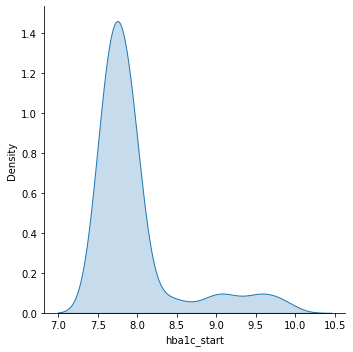

In [106]:
sns.displot(data=patients_df1,x='hba1c_start',kind='kde',fill=True)

In [107]:
patients_df1['hba1c_start'].skew() # ppositvely skewed

2.197682734699073

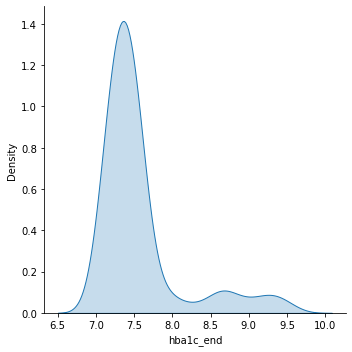

In [108]:
sns.displot(data=patients_df1,x='hba1c_end',kind='kde',fill=True)

In [109]:
patients_df1['hba1c_end'].skew()

2.1552680819794885

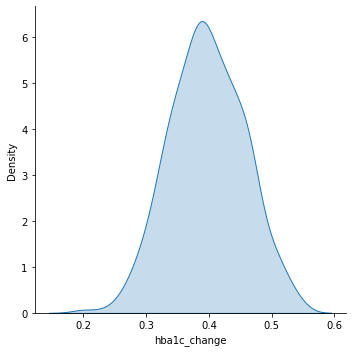

In [110]:
sns.displot(data=patients_df1,x='hba1c_change',kind='kde',fill=True)

In [111]:
patients_df1['hba1c_change'].skew()

-0.04160424929992361

In [112]:
patients_df1['type'].value_counts()

novodra    170
auralin    169
Name: type, dtype: int64

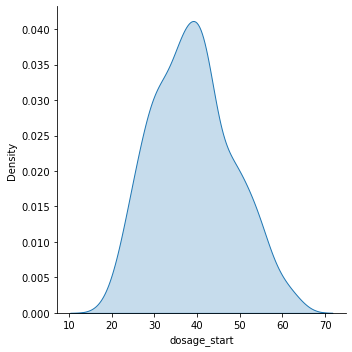

In [113]:
sns.displot(data=patients_df1,x='dosage_start',kind='kde',fill=True)

In [114]:
patients_df1['dosage_start'].skew()

0.28637048503903784

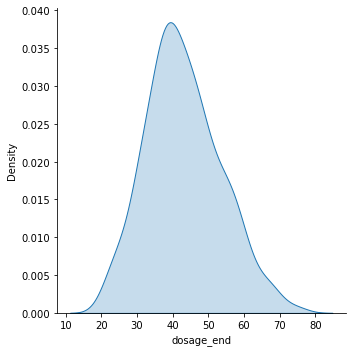

In [115]:
sns.displot(data=patients_df1,x='dosage_end',kind='kde',fill=True)

In [116]:
patients_df1['dosage_end'].skew() # roughly normally distributed

0.382371781671321

<AxesSubplot:ylabel='adverse_reaction'>

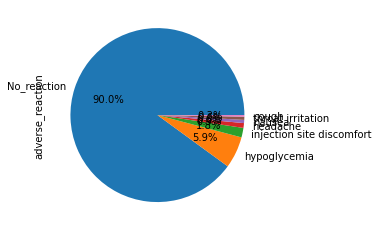

In [119]:
# percentage of adverse reactions
patients_df1['adverse_reaction'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='state'>

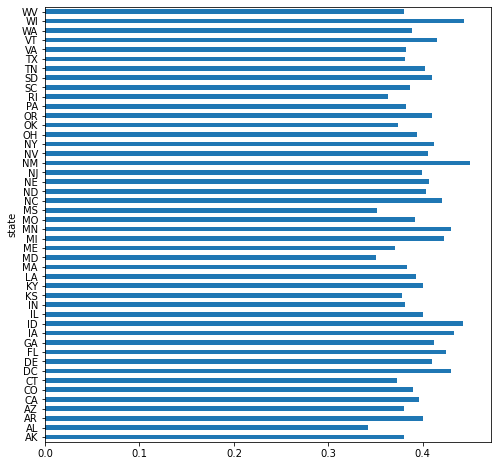

In [140]:
#state wise average hba1c_change
plt.figure(figsize=(8,8))
patients_df1.groupby('state')['hba1c_change'].mean().plot(kind='barh')


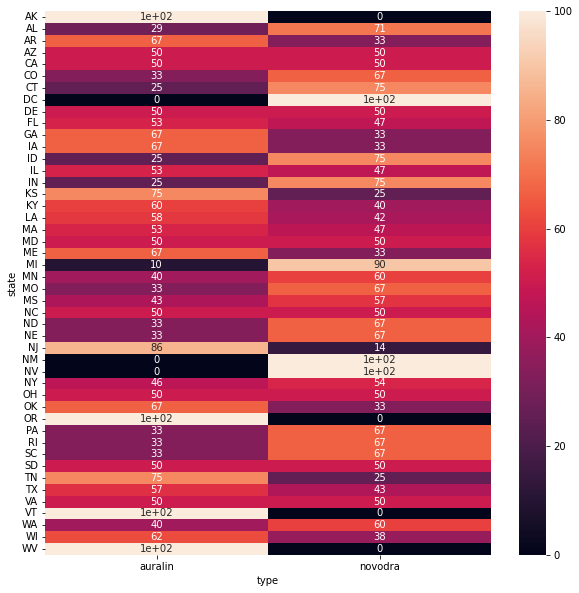

In [141]:
# state wise how much percent of patient got auralin and novodra
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(patients_df1['state'],patients_df1['type'],normalize='index')*100,annot=True)
plt.show()

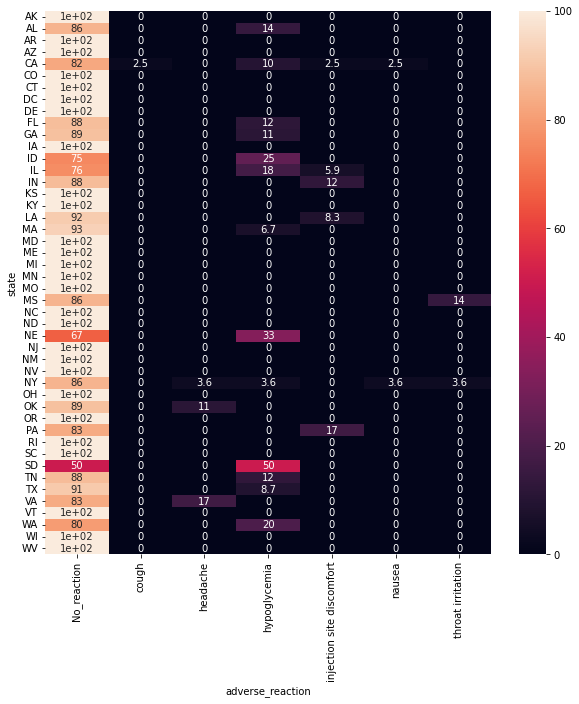

In [142]:
# state wise percentage of people having adverse reaction

plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(patients_df1['state'],patients_df1['adverse_reaction'],normalize='index')*100,annot=True)
plt.show()

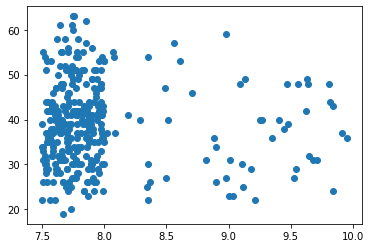

In [144]:
# to get association between hba1c_start, dosage_start
plt.scatter(patients_df1['hba1c_start'],patients_df1['dosage_start'])

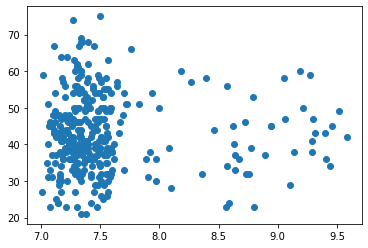

In [145]:
plt.scatter(patients_df1['hba1c_end'],patients_df1['dosage_end'])

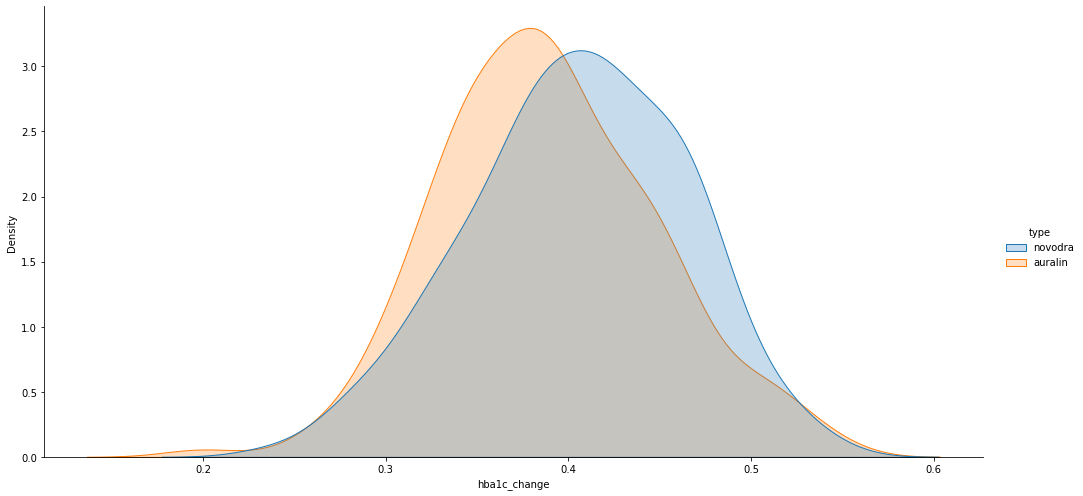

In [147]:

#treatment wise distribution of hba1c change
sns.displot(data=patients_df1,x='hba1c_change',kind='kde',hue='type',fill=True,height=7,aspect=2)
plt.show()

In [149]:
patients_df1.groupby('type')['hba1c_change'].skew() # roughly normally distributed

type
auralin    0.155690
novodra   -0.237223
Name: hba1c_change, dtype: float64

In [150]:
import scipy.stats as stats
groups = []
for value in patients_df1['type'].unique():
    groups.append(patients_df1[patients_df1['type'] == value]['hba1c_change'])
f, p = stats.f_oneway(*groups)
print(f"type: {'type'} \nF-value: {f} \nP-value: {p} \n")

type: type 
F-value: 6.57677936203645 
P-value: 0.010764503070455867 



In [154]:
# treatments wise adverse reactions
patients_df1.groupby('type')['adverse_reaction'].value_counts()

type     adverse_reaction         
auralin  No_reaction                  155
         hypoglycemia                  10
         throat irritation              2
         headache                       1
         nausea                         1
novodra  No_reaction                  150
         hypoglycemia                  10
         injection site discomfort      6
         headache                       2
         cough                          1
         nausea                         1
Name: adverse_reaction, dtype: int64

In [155]:
patients_df1.groupby('assigned_sex')['adverse_reaction'].value_counts()
#sex wise adverse reactions

assigned_sex  adverse_reaction         
female        No_reaction                  154
              hypoglycemia                  13
              injection site discomfort      3
              headache                       1
              nausea                         1
              throat irritation              1
male          No_reaction                  151
              hypoglycemia                   7
              injection site discomfort      3
              headache                       2
              cough                          1
              nausea                         1
              throat irritation              1
Name: adverse_reaction, dtype: int64

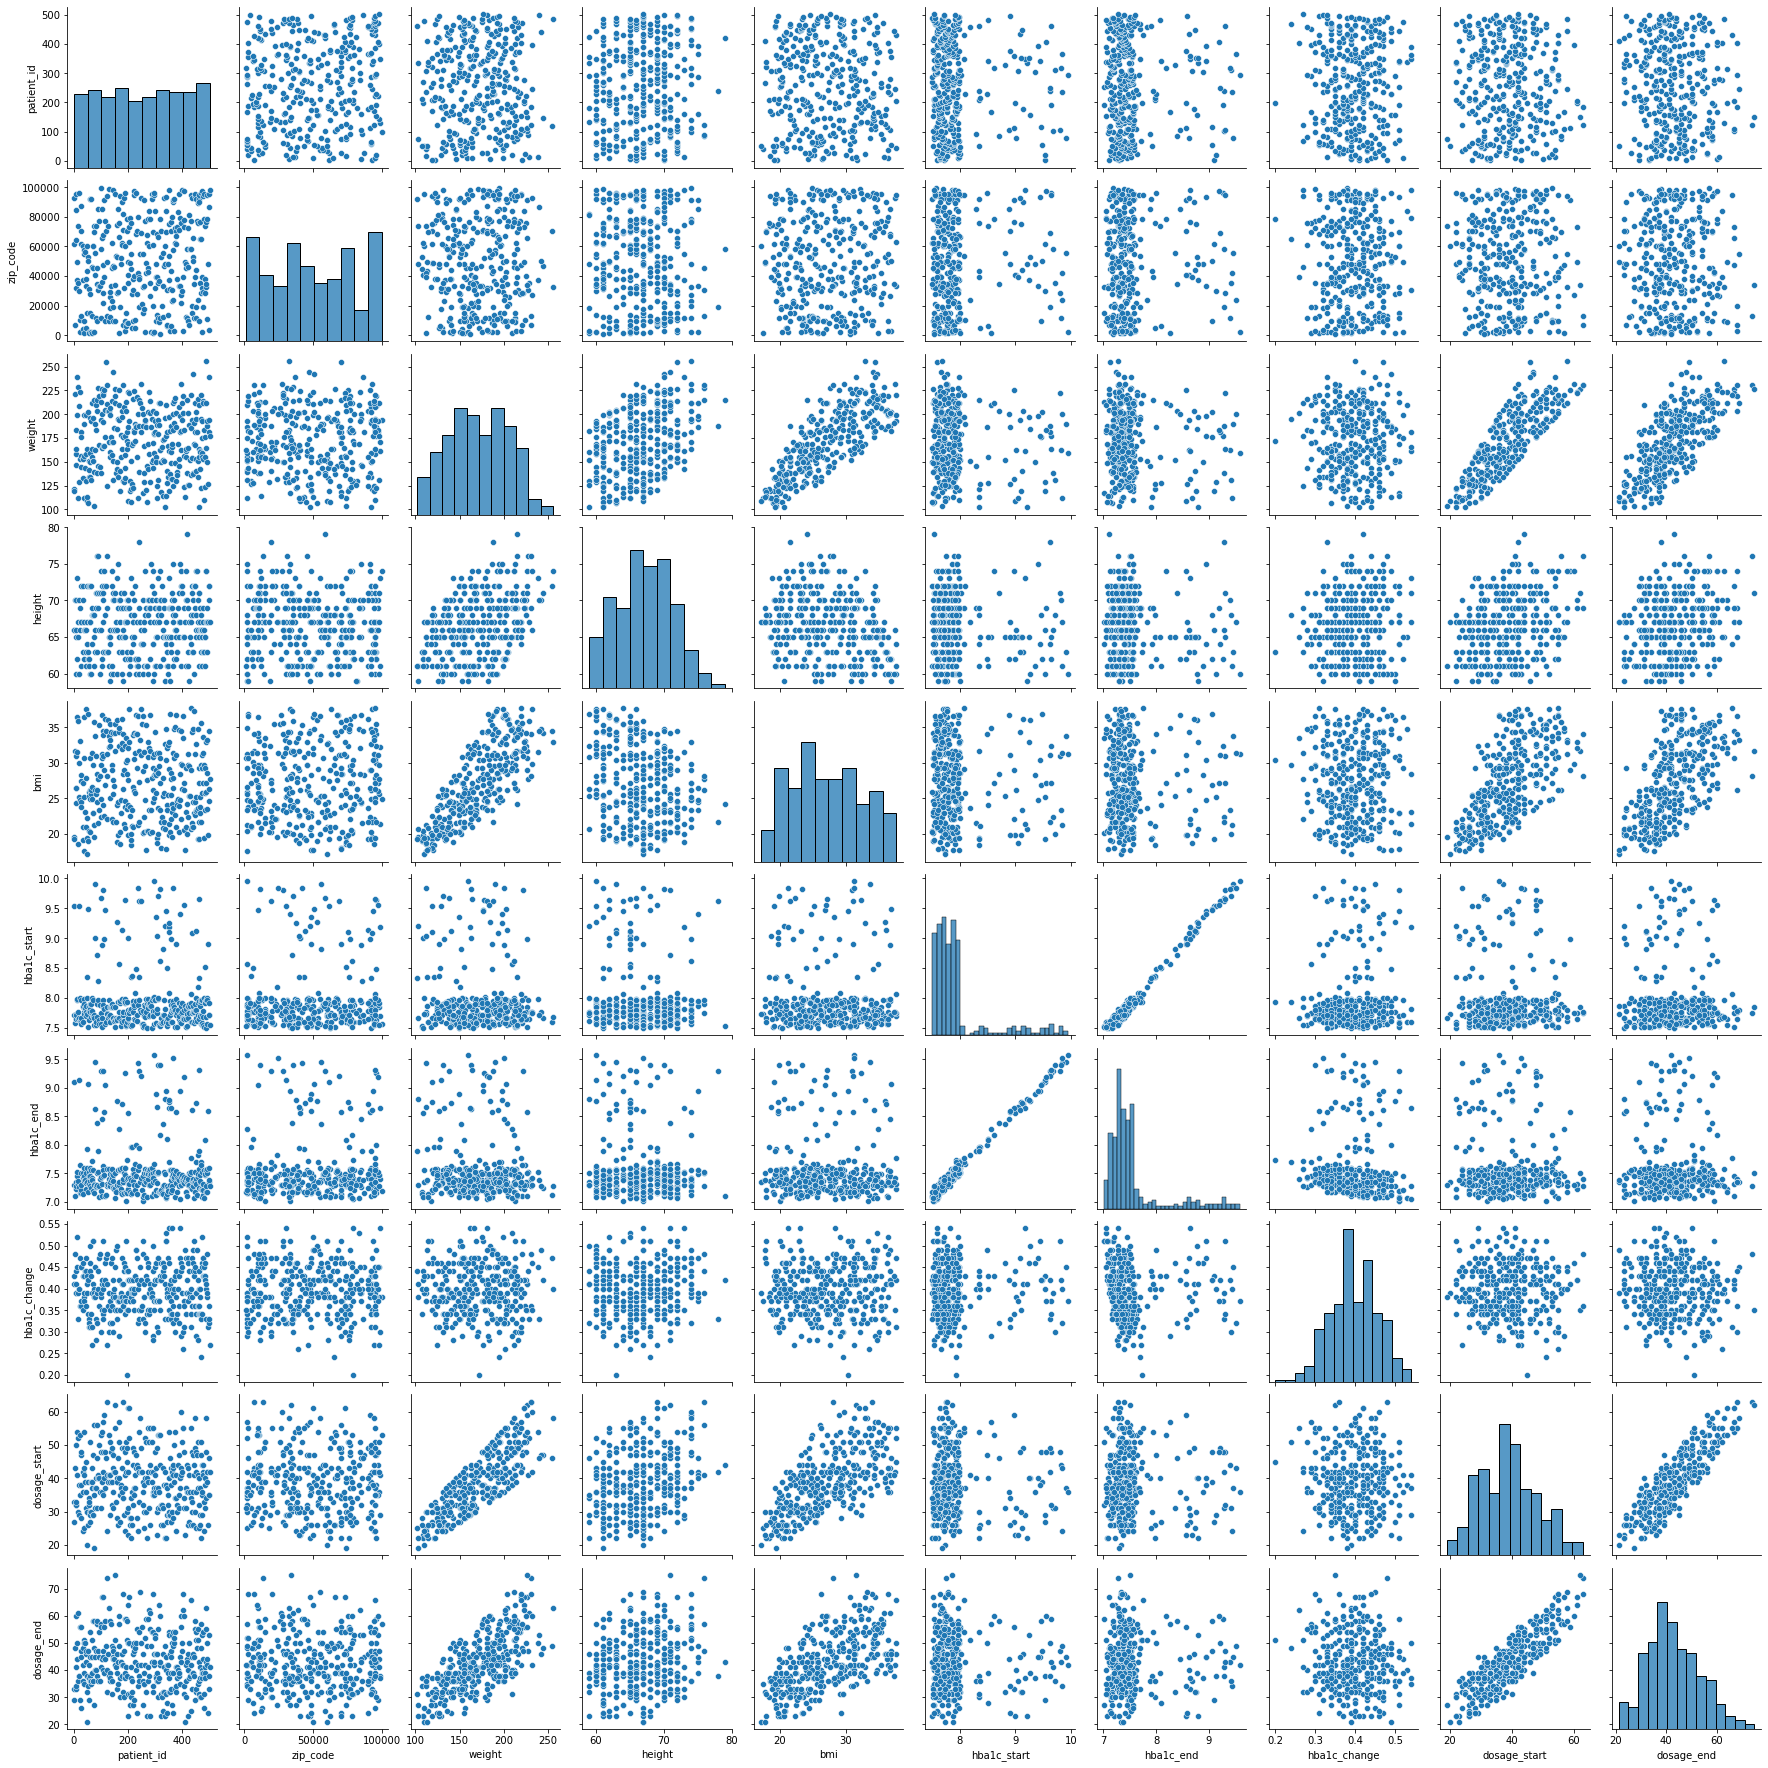

In [151]:
sns.pairplot(patients_df1)
#To get association between all the variables

<AxesSubplot:>

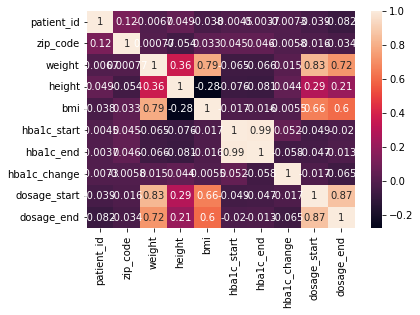

In [153]:
sns.heatmap(patients_df1.corr(),annot=True)# correlation bewtween numerical variables

Results:


    1) There is no significant mean hbac1 change for male and female.
    
    2) From states California and Newyork most number of patients are participated for clincal trail.
    
    3) New York,Houston,San Diego,Tulsa,and Lombard are top 5 cities for most number of patients.
    
    4) 90 % of patients have no any adverse reaction due to auralin or novodra.
    
    5) 6 % of patients having hypoglycema adverse reaction due to auralin or novodra.
    
    6) 1.8 % patients having injection site discomfort due to novodra.
    
    7) WI,NV,IL state patients showing significant average maximum hba1c change as compare to others.
    
    8) 100 % of patients from AK,OR and VT states had given auralin and 100% of people from DC,NM and 
    NV states had given novodra.
    
    9) 50% of people from SD state having hypoglycima adverse reaction.
    
    10) Only patients from VA,OK,Ny having headache as adverse raection.
    
    11) 14 % patients from state Ms having  throat irritation as adverse reaction.
    
    12) Average hba1c change for novodra is roughly more than that of auralin.
    
    13) Adverse reactions due to Auralin is significantly less than that of novodra.
    
    14) female patients are more likely to have hypoglycima adverse reaction.
    
    15) Auralin is as effective as novodra.
    